### Table of Contents

# 1. Import Data

## 1.1 Import the needed libraries

In [289]:
from datetime import date
from datetime import datetime
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_columns', None)

## 1.2 Import a integrate data

In [290]:
df_crm = pd.read_csv('crm.csv')
df_mkt = pd.read_csv('mkt.csv')
df_sales = pd.read_excel('sales.xlsx')

In [291]:
df = pd.merge(pd.merge(df_crm,df_sales,on='CustomerID',how="inner"),df_mkt,on="CustomerID",how="inner")

## 1.3 Set Index


In [292]:
df.set_index('CustomerID',inplace = True)

## 1.4 Check and removing duplicates

In [293]:
df[df.duplicated()] # checking duplicates

Name  Birthyear   Education Marital_Status  \
CustomerID                                                                   
32924               Mrs. Wanda Terry       1986  Graduation       Divorced   
8276               Mrs. Mary Jackson       1968  HighSchool        Married   
32966               Mr. Steven Baker       1961  HighSchool        Married   
5627              Mr. Jonathan Clark       1988  Graduation        Married   
29357              Mr. Eric Springer       1972         PhD        Married   
26891                  Mr. Sam Peake       1992  Graduation        Married   
21269              Mr. Nathan Glover       1971  Graduation        Married   
32777                  Mr. Joe James       1967      Master        Married   
26285           Mr. Oliver Sanderson       1986       Basic       Together   
5540              Mr. Justin MacLeod       1995  Graduation       Together   
17069             Miss Zoe Underwood       1977  Graduation       Together   
12320         Mr. Christian Morrison       1985      Master        Married   
24260                Mr. Dan Langdon       1993  Graduation         Single   
6470                Miss Diane White       1980  Graduation         Single   
10265                 Mr. Max Martin       1988  HighSchool       Together   
21767                 Mrs. Jan Sharp       1977      Master        Married   
15905              Mr. Charles James       1957         PhD       Together   
28688             Mr. Anthony Gibson       1976  Graduation       Together   
28739          Mr. Stephen Henderson       1970  Graduation        Married   
25052                Mr. Piers Nolan       1977      Master       Divorced   
7586                Mr. Jason Powell       1985      Master        Married   
32495             Miss Wanda Wallace       1962  Graduation       Together   
19295              Mr. Justin Martin       1998  Graduation       Together   
14942              Mr. Stewart North       1978         PhD       Together   
20747               Mr. Luke Lambert       1988         PhD        Married   
12035              Mrs. Heather Hart       1985  Graduation        Married   
8447               Mrs. Grace Davies       1967  Graduation        Married   
25685                Mr. Austin Knox       1955         PhD          Widow   
28625                Mr. Frank Piper       1969       Basic        Married   
28844                  Mr. Neil Dowd       1981  Graduation        Married   
30464       Miss Gabrielle Churchill       1960  Graduation       Together   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
32924        41264.0             1               1  2020-10-03 00:00:00   
8276        118238.0             0               0  2020-10-13 00:00:00   
32966        84974.0             0               1  2022-02-17 00:00:00   
5627         40975.0             1               0  2022-04-28 00:00:00   
29357        77778.0             0               1  2022-04-19 00:00:00   
26891        74147.0             1               0  2022-03-21 00:00:00   
21269        91241.0             0               1  2022-03-28 00:00:00   
32777       101251.0             0               1  2021-12-30 00:00:00   
26285        22345.0             1               0  2021-03-21 00:00:00   
5540         44247.0             1               0  2021-03-08 00:00:00   
17069        75226.0             1               1  2020-11-24 00:00:00   
12320        39747.0             1               0  2021-04-06 00:00:00   
24260       116645.0             0               0  2021-05-18 00:00:00   
6470        127255.0             0               0  2021-06-17 00:00:00   
10265        27838.0             1               0  2021-10-08 00:00:00   
21767        54507.0             1               1  2020-10-27 00:00:00   
15905        95655.0             0               0  2020-09-04 00:00:00   
28688        77992.0            

31 duplicated rows, with the entire same value

In [294]:
df = df[~df.duplicated()] # drop duplicates rows

# 2. Explore Data

## 2.1 Basic Exploration

Q: _To check the number of columns and rows_ we used `shape` _attribute_

In [295]:
df.shape

(7000, 26)

A: _The dataset has **7000 rows** and **26 columns**_

__*Q*__: Check the name of the features of the dataset we used `columns` _attribute_

In [296]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Complain', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5'],
      dtype='object')

Q: First glance of the dataset using `head` to show 5 rows.

In [297]:
df.head(5)

Name  Birthyear   Education Marital_Status  \
CustomerID                                                             
14594          Miss Leah Lewis       1981  Graduation         Single   
19070         Miss Grace Black       1974  Graduation       Together   
29888       Mr. Gavin Morrison       1960         PhD       Together   
12221          Mr. Ryan Glover       1980  Graduation        Married   
21107        Mr. Paul Anderson       1971  HighSchool         Single   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
14594       113947.0             0               0  2021-01-09 00:00:00   
19070       114297.0             0               0  2021-04-10 00:00:00   
29888       115476.0             0               0  2022-01-12 00:00:00   
12221       101172.0             1               1  2021-10-12 00:00:00   
21107       123128.0             0               0  2020-12-11 00:00:00   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
14594          43.0        4640.0        3380               5700.0     2240.0   
19070          74.0        7080.0        3680               7620.0     1840.0   
29888          85.0        4130.0         380               4890.0     3640.0   
12221          25.0        3590.0           0               1770.0       80.0   
21107          64.0        5390.0        1126               9495.0      656.0   

            MntDesserts  MntAdditionalRequests  NumOfferPurchases  \
CustomerID                                                          
14594             562.0                  154.0                  2   
19070            1220.0                   46.0                  1   
29888             380.0                   28.0                  1   
12221             180.0                   14.0                  5   
21107             562.0                   74.0                  0   

            NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  \
CustomerID                                                             
14594                    10                     7                  7   
19070                     5                     9                 12   
29888                     5                     5                  7   
12221                     8                     3                  8   
21107                     4                     7                  8   

            NumAppVisitsMonth  Complain  Response_Cmp1  Response_Cmp2  \
CustomerID                                                              
14594                       4         0              0              1   
19070                       2         0              0              0   
29888                       1         0              0              0   
12221                       5         0              0              0   
21107                       5         0              1              0   

            Response_Cmp3  Response_Cmp4  Response_Cmp5  
CustomerID                                               
14594                   0              0              0  
19070                   0              0              0  
29888                   0              0              0  
12221                   0              0              0  
21107                   1              0              0

Q: To check the basic information of the dataset we've used the `info` method

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

>A: We can observe the data type of the dataset and the how many of features per data type  `dtypes: float64 - (7), int64 - (15), object - (4)`, the memory usage of `1.4+MB`, and the non-null values present per columns. <br>
> Using only `info` method we understand that `'Education', 'Recency', 'MntDrinks'` have __14, 23, 28 null values__ that require some action.

# 2.2 Statistical Exploration

## 2.2.1 Numerical Variables

In [299]:
df.describe()

Birthyear      Income  Kid_Younger6  Children_6to18   Recency  \
count   7000.000    7000.000      7000.000        7000.000  6977.000   
mean    1976.451   77988.962         0.441           0.491    49.235   
std       11.996   35409.810         0.543           0.542    28.923   
min     1948.000    2493.800         0.000           0.000     0.000   
25%     1967.000   51586.250         0.000           0.000    24.000   
50%     1977.000   77190.000         0.000           0.000    49.000   
75%     1985.000  102016.250         1.000           1.000    74.000   
max     2005.000  237639.725         2.000           2.000    99.000   

       MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
count      7000.000    7000.000             7000.000   6972.000     7000.000   
mean       3079.524     534.749             2785.051    545.658      540.656   
std        3370.377     787.847             3908.718    805.149      802.222   
min           0.000       0.000                0.000      0.000        0.000   
25%         250.000      40.000              240.000     40.000       40.000   
50%        1820.000     180.000             1110.000    180.000      180.000   
75%        5070.000     680.000             3795.000    700.000      680.000   
max       14980.000    3980.000            25974.000   3980.000     3980.000   

       MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
count               7000.000           7000.000         7000.000   
mean                  42.556              2.448            6.016   
std                   49.651              2.307            2.746   
min                    0.000              0.000            0.000   
25%                    9.000              1.000            4.000   
50%                   24.000              2.000            6.000   
75%                   57.000              3.000            8.000   
max                  249.000             16.000           13.000   

       NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  Complain  \
count              7000.000           7000.000           7000.000  7000.000   
mean                  3.835              5.791              5.278     0.010   
std                   3.331              3.296              2.749     0.101   
min                   0.000              0.000              0.000     0.000   
25%                   1.000              3.000              3.000     0.000   
50%                   3.000              5.000              5.000     0.000   
75%                   5.000              8.000              7.000     0.000   
max                  24.000             13.000             20.000     1.000   

       Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
count       7000.000       7000.000       7000.000       7000.000   
mean           0.079          0.073          0.083          0.066   
std            0.270          0.261          0.276          0.248   
min            0.000          0.000          0.000          0.000   
25%            0.000          0.000          0.000          0.000   
50%            0.000          0.000          0.000          0.000   
75%            0.000          0.000          0.000          0.000   
max            1.000          1.000          1.000          1.000   

       Response_Cmp5  
count       7000.000  
mean           0.014  
std            0.119  
min            0.000  
25%            0.000  
50%            0.000  
75%            0.000  
max            1.000

> _The describe return we can get a first glance and make some conclusion:_

>__Birthyear__ - could originate an Age column for readability purposes<br>
__Income__ - Min and Max are very far from each other and far from the mean value which could indicate outliers<br>
__Recency__ - 6977 valid values, hence we should look in deep and decide on how to minimize that effect of missing values<br>
__MntMeat&Fish__ - Min and Max are distant from each other and have high standard deviation which could effect some future conclusion<br>
__MntEntries__ - Again has high standard deviation that we should analyze, Min and Max far apart, similar to MntMeat&Fish<br>
__MntVegan&Vegetarian__ - Similar to the previous two Mnt columns<br>
__MntDrinks, MntDesserts__ - Seems to be very similar between them<br>
__MntAdditionalRequests__ - The max value standard deviation seems high and also the max value very far apart from the mean<br>
__NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth__  - Have a max value to distante from the mean that could be true but we need to take into account<br>
__NumAppPurchases, SumStorePurchases__ - Seems does not have strange summary statistcs<br>
__Kid_Younger6, Children_6to18__ - 75% of clients have at least one child

**Q**: Skewness of each variable 

In [300]:
df.skew()

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_31734/547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.092
Income                   0.845
Kid_Younger6             0.694
Children_6to18           0.452
Recency                  0.018
MntMeat&Fish             1.149
MntEntries               2.087
MntVegan&Vegetarian      2.487
MntDrinks                2.046
MntDesserts              2.058
MntAdditionalRequests    1.827
NumOfferPurchases        2.861
NumAppPurchases          0.526
NumTakeAwayPurchases     2.254
NumStorePurchases        0.623
NumAppVisitsMonth        1.005
Complain                 9.709
Response_Cmp1            3.119
Response_Cmp2            3.276
Response_Cmp3            3.024
Response_Cmp4            3.501
Response_Cmp5            8.188
dtype: float64

Concerning the variables' skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Birthyear, Income, Kid_Younger6, Children_6to18, Recency, NumAppPurchases, NumStorePurchases, NumAppVisitsMonth
- `High skewness (higher than |1.0|)`: MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5

In [301]:
df.kurt()

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_31734/3952544226.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.857
Income                    2.649
Kid_Younger6             -0.651
Children_6to18           -0.973
Recency                  -1.198
MntMeat&Fish              0.532
MntEntries                4.096
MntVegan&Vegetarian       8.432
MntDrinks                 3.839
MntDesserts               3.813
MntAdditionalRequests     3.084
NumOfferPurchases        10.998
NumAppPurchases          -0.223
NumTakeAwayPurchases      8.582
NumStorePurchases        -0.694
NumAppVisitsMonth         4.993
Complain                 92.299
Response_Cmp1             7.728
Response_Cmp2             8.731
Response_Cmp3             7.145
Response_Cmp4            10.263
Response_Cmp5            65.062
dtype: float64

Features with kurtosis higher than 3 could indicate presence of outliers, hence we should have special consideration with the following features:
>MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, NumOfferPurchases, NumAppVisitsMonth

Note: Binomial Variables Complain, and Response_Cmp1 the kurtosis we will not consider as outliers

## 2.2.2 Categorical Values

In [302]:
df.describe(include = object)

Name   Education Marital_Status       Date_Adherence
count                7000        6986           7000                 7000
unique               6241           9             10                  701
top     Mr. Stewart Grant  Graduation        Married  2020-09-19 00:00:00
freq                    3        3497           2830                   23

We can conclude that the education as **14 missing** values

#### Level/Possible values of Categorical Features

### `Name` prefix unique values and count

In [303]:
df['Name'].str.partition(" ")[0].value_counts()

Mr.     5133
Miss    1469
Mrs.     398
Name: 0, dtype: int64

With the prefix we can generate a `Male` and `Female` feature to further explore the dataset. We will deal with that in the data transformation capther

#### **`Gender`** feature creation

In [304]:
df["Gender"] = df['Name'].str.partition(" ")[0]
df['Male'] = df['Gender'].apply(lambda x: 1 if x == "Mr." else 0)
df['Female'] = df['Gender'].apply(lambda x: 1 if x in["Miss","Mrs."] else 0)
df.drop("Gender", axis= 1, inplace=True)

### `Education` unique values and count

In [305]:
df["Education"].value_counts()

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

We have some issues that will need trasformatioin:<br>
- Graduation, Master, HighSchool are written in different ways<br>
- `Basic` and `HighSchool` need different levels?

#### Education standardization

In [306]:
df = df.replace({"Education":{"master":"Master", "graduation":"Graduation", "phd":"PhD","highschool":"HighSchool"}})

### `Marital_Status` unique values and count

In [307]:
df["Marital_Status"].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

Similarly to previous feature we also have some issues that need transformation:<br>
- Married, Together, Single, Divorced and Widow are written with lower and capital letters
- We could also consider that Married and Together are similar and joined them in the same level<br>

#### Marital_Status standardization

In [308]:
df = df.replace({"Marital_Status":{"married":"Married", "together":"Married", "single":"Single","widow":"Widow","divorced":"Divorced","Together":"Married"}})
df["Marital_Status"].value_counts()

Married     4572
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

`Date_Adherence` unqiue values and count

In [309]:
df["Date_Adherence"].value_counts()

2020-09-19    23
2021-08-22    20
2021-07-30    20
2022-05-23    20
2021-08-21    19
              ..
2021-03-09     3
2020-09-18     2
2020-07-30     2
2020-08-29     2
2021-03-22     2
Name: Date_Adherence, Length: 701, dtype: int64

`Date_Adherence` is a date and will need transformation to a date format for further exploration

# 3. Preprocess Data

### 3.1.2. Missing Values

In [310]:
df.isna().sum()

Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Male                      0
Female                    0
dtype: int64

- **`Education`**, **`Recency`**, **`MntDrinks`** and **`MntTotal`** (due to dependancy of `MntDrinks`) have missing values

#### Filling the missing values

Fill `Education` with the mode

In [311]:
df["Education"].fillna(df["Education"].mode()[0], inplace = True)

Fill `Recency` with the median value

In [312]:
df["Recency"].fillna(df["Recency"].mean(), inplace = True)

Fill Mnt values

In [313]:
df_mnt = df[[ 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests']]

imputer = KNNImputer(n_neighbors=3)
array_impute = imputer.fit_transform(df_mnt)
df_mnt = pd.DataFrame(array_impute, columns = df_mnt.columns)

In [314]:
df["MntDrinks"] = df_mnt["MntDrinks"].values

In [315]:
df.isna().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Complain                 0
Response_Cmp1            0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Male                     0
Female                   0
dtype: int64

## 3.2. Data Transformation

### 3.2.1. Create new Variables

### Utils

In [316]:
df['NumPurchasesTotal'] = df['NumTakeAwayPurchases'] + df['NumStorePurchases'] + df['NumAppPurchases']

#### Creating Age variable from the Birthyear

In [317]:
df['Age'] = df.Birthyear.apply(lambda x: date.today().year-x)

In [318]:
df.drop('Birthyear', axis= 1, inplace = True)

#### Creating card adherence age variable from the Date adherence

In [319]:
df = df.replace({"Date_Adherence":{"2/29/2022": datetime.strptime("2022-03-01", '%Y-%m-%d')}})

#2022 is not a leap year, therefore 29/02/2022 is not a possible day

In [320]:
df['daysAsCardClient'] = df['Date_Adherence'].apply(lambda x: (date.today() - x.date()).days)

In [321]:
df.drop('Date_Adherence', axis= 1, inplace = True)

#### Fill Education

In [322]:
edu_encode = pd.get_dummies(df.Education, drop_first= True) #TODO ver se nao ha formas melhores para tratar desta categoria
df = pd.concat([df, edu_encode], axis = 1)

In [323]:
df.head()

Name   Education Marital_Status    Income  \
CustomerID                                                            
14594          Miss Leah Lewis  Graduation         Single  113947.0   
19070         Miss Grace Black  Graduation        Married  114297.0   
29888       Mr. Gavin Morrison         PhD        Married  115476.0   
12221          Mr. Ryan Glover  Graduation        Married  101172.0   
21107        Mr. Paul Anderson  HighSchool         Single  123128.0   

            Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                                    
14594                  0               0     43.0        4640.0        3380   
19070                  0               0     74.0        7080.0        3680   
29888                  0               0     85.0        4130.0         380   
12221                  1               1     25.0        3590.0           0   
21107                  0               0     64.0        5390.0        1126   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                
14594                    5700.0     2240.0        562.0   
19070                    7620.0     1840.0       1220.0   
29888                    4890.0     3640.0        380.0   
12221                    1770.0       80.0        180.0   
21107                    9495.0      656.0        562.0   

            MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
CustomerID                                                              
14594                       154.0                  2               10   
19070                        46.0                  1                5   
29888                        28.0                  1                5   
12221                        14.0                  5                8   
21107                        74.0                  0                4   

            NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  \
CustomerID                                                               
14594                          7                  7                  4   
19070                          9                 12                  2   
29888                          5                  7                  1   
12221                          3                  8                  5   
21107                          7                  8                  5   

            Complain  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
CustomerID                                                          
14594              0              0              1              0   
19070              0              0              0              0   
29888              0              0              0              0   
12221              0              0              0              0   
21107              0              1              0              1   

            Response_Cmp4  Response_Cmp5  Male  Female  NumPurchasesTotal  \
CustomerID                                                                  
14594                   0              0     0       1                 24   
19070                   0              0     0       1                 26   
29888                   0              0     1       0                 17   
12221                   0              0     1       0                 19   
21107                   0              0     1       0                 19   

            Age  daysAsCardClient  Graduation  HighSchool  Master  PhD  
CustomerID                                                              
14594        42               827           1           0       0    0  
19070        49               736           1           0       0    0  
29888        63               459           0           0       0    1  
12221        43               551           1           0       0    0  
21107        52               856           0           1       0  

In [324]:
df.drop('Education', axis = 1, inplace = True)

#### Fill Maritial Status

In [325]:
marital_encode = pd.get_dummies(df.Marital_Status, drop_first= True)
df = pd.concat([df, marital_encode], axis = 1)

In [326]:
df.drop('Marital_Status', axis= 1, inplace = True)

#### Create MntTotal

In [327]:
df["MntTotal"] = df['MntMeat&Fish'] + df['MntEntries'] + df['MntVegan&Vegetarian'] + df['MntDrinks'] + df['MntDesserts'] + df['MntAdditionalRequests']
df["MntTotal"]

CustomerID
14594    16676.0
19070    21486.0
29888    13448.0
12221     5634.0
21107    17303.0
          ...   
30686    15665.0
17210    24246.0
29186      680.0
23312      647.0
15581    15269.0
Name: MntTotal, Length: 7000, dtype: float64

#### Create Mnt Pday Card

In [328]:
df['Mnt_pday_card']= df.MntTotal/df.daysAsCardClient

#### Create Response Campaigns

In [329]:
df['Response_Campaigns'] = df['Response_Cmp1'] + df['Response_Cmp2'] + df['Response_Cmp3'] + df['Response_Cmp4'] + df['Response_Cmp5']

#### Create Total Kids

In [330]:
df["Total_Kids"] = df["Kid_Younger6"] + df["Children_6to18"]

#### Create Has Kids

In [331]:
df["has_Kids"] = df["Total_Kids"].apply(lambda x: 0 if x == 0 else 1)
df["has_Kids"]

CustomerID
14594    0
19070    0
29888    0
12221    1
21107    0
        ..
30686    0
17210    0
29186    1
23312    1
15581    0
Name: has_Kids, Length: 7000, dtype: int64

#### Create age_bins

In [332]:
df["age_bins"] = pd.cut(df["Age"], bins = 5)
age_bin = pd.get_dummies(df['age_bins'],prefix='age')
df = pd.concat([df,age_bin], axis=1)
df.drop(['age_bins'],axis=1, inplace=True)

#### Create MNT Ratios

In [333]:
df['Pct_Meat&Fish'] = df['MntMeat&Fish']/df['MntTotal']
df['Pct_Desserts'] = df['MntDesserts']/df['MntTotal']
df['Pct_Entries'] = df['MntEntries']/df['MntTotal']
df['Pct_Drinks'] = df['MntDrinks']/df['MntTotal']
df['Pct_Vegan&Vegetarian'] = df['MntVegan&Vegetarian']/df['MntTotal']
df['Pct_AdditionalRequests'] = df['MntAdditionalRequests'] /df['MntTotal']

#### Create Behavior Ratios

In [334]:
df['Pct_Store'] = df['NumStorePurchases']/df['NumPurchasesTotal']
df['Pct_App'] = df['NumAppPurchases']/df['NumPurchasesTotal']
df['Pct_TakeAway'] = df['NumTakeAwayPurchases']/df['NumPurchasesTotal']

## Incoherencies

Check and drop consumers who have monetary spent but don't have a purchase registry

In [335]:
df[(df[['MntMeat&Fish', 'MntEntries',
        'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
        'MntAdditionalRequests']].sum(axis = 1) > 0) & (df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis = 1) <= 0)]

Name      Income  Kid_Younger6  Children_6to18  \
CustomerID                                                                      
6185              Mr. Matt Clarkson    4609.600             2               0   
20405          Mr. Stephen Paterson  229052.725             0               1   
11126            Mr. Michael Arnold  228750.025             2               1   
5318             Mr. Liam MacDonald    3005.400             0               0   
6164              Mr. Anthony Grant  229113.325             1               0   
8780              Mr. Brandon Black  226439.025             0               0   
25079             Mr. Harry Dickens    5048.000             0               1   
23297              Mr. Harry Newman    3909.600             1               1   
34565          Miss Jasmine Russell    7644.800             1               1   
5108          Mr. Sebastian Abraham   10724.200             0               0   
10622             Mr. Keith Randall  231009.025             1               1   
27515         Mr. Sebastian Wallace  231360.525             0               1   
28916                 Mr. Dan Vance  226865.425             1               0   
18872             Miss Rachel Young    3550.000             1               0   
13388                Mr. Eric Berry    4554.800             1               0   
14084       Mr. Christopher MacLeod    5281.300             1               0   
5366                 Mr. Boris Reid    6065.100             1               1   
31409           Mr. Christian Allan    3746.500             1               0   
26711            Mr. Nicholas Baker  229626.425             1               1   
29573              Miss Fiona Walsh  231001.225             1               1   
15068               Mr. Jason Avery  228085.825             1               0   
30521          Miss Stephanie Terry    3623.700             0               0   
23372              Mr. Sam Buckland  227738.325             1               0   
28061                Mr. Adam Black    3133.700             1               0   
14132               Mr. Tim Edmunds  229935.325             1               1   
29633              Miss Sophie Ross  230027.625             1               0   
27845              Miss Emily Alsop  231928.425             1               1   
10547             Mr. Thomas Slater    3478.000             0               0   
26696           Mr. Charles Pullman    5171.200             0               0   
17573          Mr. Dominic Hemmings  229161.925             1               1   
15911          Miss Pippa Underwood    4472.200             1               0   
12800           Mr. Sebastian Paige    7175.500             2               2   
17996               Mr. Paul Peters    7507.000             0               1   
31586              Mr. Blake Tucker  231612.325             1               1   
11960              Mrs. Sally Sharp  226393.625             1               0   
5132           Mrs. Lillian Stewart  227063.725             0               0   
7127                Mr. Joe Chapman    6324.300             1               0   
22133               Mr. Evan Bailey    7326.000             1               0   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
6185           32.0          19.0          10                 73.5       10.0   
20405           0.0          80.0           2                 55.5        0.0   
11126          95.0          51.0          10                 37.5        2.0   
5318           16.0           5.0           8                  7.5        6.0   
6164           38.0          11.0           0                  7.5        0.0   
8780           35.0           6.0          16                 45.0       52.0   
25079          64.0          13.0           4                  4.5        0.0   
23297          29.0          12.0           0                

In [336]:
df.drop(df.loc[(df[['MntMeat&Fish', 'MntEntries',
                    'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
                    'MntAdditionalRequests']].sum(axis = 1) > 0) & (df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis = 1) <= 0)].index,inplace=True)

In [337]:
df[(df[['MntMeat&Fish', 'MntEntries',
        'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
        'MntAdditionalRequests']].sum(axis = 1) > 0) & (df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis = 1) <= 0)] # confirmação do ajuste

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

Check consumers who have more Individual Purchases than total Purchases

In [338]:
df[(df['NumOfferPurchases'] > df[['NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases']].sum(axis=1))]

Name   Income  Kid_Younger6  Children_6to18  \
CustomerID                                                                 
7733           Mr. Jonathan Peake  10214.7             0               1   
11753          Mr. Andrew Thomson  12680.0             0               0   
7679             Miss Carol Clark  11211.9             1               0   
20819           Mr. Colin Forsyth   7875.9             0               2   
12011             Mr. Keith Mills   8503.6             0               0   
31391          Mr. Justin Forsyth   9709.1             0               0   
26018          Mr. Alan Sanderson   9539.3             1               1   
33314         Mr. Michael Parsons  10468.8             0               1   
33191               Mr. Phil Kerr  11628.4             0               0   
34802            Miss Ava Randall  11552.4             1               1   
33236       Mr. Stewart Henderson   6535.7             0               1   
23306          Mr. Michael Glover  10582.4             0               0   
28973         Miss Sonia Hemmings   9599.2             0               1   
16043          Miss Wendy Coleman  13985.1             1               1   
27335             Mr. Alan Mathis   7984.8             1               1   
11162           Mr. Leonard Nolan  11451.7             0               0   
23030            Miss Lily Gibson   9153.4             0               1   
13748             Mr. David Paige   9432.2             0               1   
25838           Mrs. Rebecca Gray   6577.2             0               0   
7448            Mr. Jake Mitchell  14060.7             0               0   
21251       Miss Kimberly Ellison   7298.2             0               1   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
7733           53.0         991.0          72                217.5       24.0   
11753          67.0         450.0          60               1126.5      266.0   
7679            2.0         739.0         214                463.5      214.0   
20819          94.0         263.0          10                349.5      106.0   
12011          70.0        1046.0           0                 31.5        0.0   
31391          26.0         304.0         184                265.5      170.0   
26018          40.0         118.0          36                121.5       62.0   
33314          10.0         851.0         170                237.0      194.0   
33191          71.0         126.0         368                672.0      276.0   
34802          17.0        1042.0           0                594.0       28.0   
33236          26.0         388.0           8                 51.0        8.0   
23306          87.0        1327.0         228                994.5      228.0   
28973          97.0         512.0          26                147.0       12.0   
16043          87.0         646.0          20                477.0       40.0   
27335          72.0         141.0           2                 43.5        0.0   
11162          68.0         516.0         398                823.5      166.0   
23030          74.0         131.0          74                136.5      100.0   
13748          99.0        1152.0           0                528.0       96.0   
25838          21.0         466.0          66                286.5      198.0   
7448           71.0         594.0         236               1246.5       47.4   
21251          20.0         216.0          20                153.0       12.0   

            MntDesserts  MntAdditionalRequests  NumOfferPurchases  \
CustomerID                                                          
7733               72.0                    1.2                 15   
11753              32.0                    4.4                 15   
7679              160.0                    3.5                 15   
20819              82.0                    8.3                 15   
12

In [339]:
df.loc[(df['NumOfferPurchases'] > df[['NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases']].sum(axis=1)),'NumOfferPurchases'] = df['NumAppPurchases'] + df['NumTakeAwayPurchases'] + df['NumStorePurchases']

In [340]:
df[(df['NumOfferPurchases'] > df[['NumAppPurchases','NumTakeAwayPurchases','NumStorePurchases']].sum(axis=1))] # confirmação do ajuste

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

### 3.1.2 Outliers

In [341]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
#ax1.boxplot(df['MntVegan&Vegetarian'])
#ax2.boxplot(df['Income'])

In [342]:
df.drop(df[abs(zscore(df['MntVegan&Vegetarian'])) > 3].index,
        inplace=True)
df.drop(df[abs(zscore(df['Income'])) > 3].index, inplace=True)


In [343]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
#ax1.boxplot(df['MntVegan&Vegetarian'])
#ax2.boxplot(df['Income'])

# 3.1.1 Skewness Correction

In [344]:
df['MntMeat&Fish'] = df['MntMeat&Fish'].apply(lambda x: np.log10(x+1))
df['MntVegan&Vegetarian'] = df['MntVegan&Vegetarian'].apply(lambda x: np.log10(x+1))
df['MntEntries'] = df['MntEntries'].apply(lambda x: np.log10(x+1))
df['MntDrinks'] = df['MntDrinks'].apply(lambda x: np.log10(x+1))
df['MntDesserts'] = df['MntDesserts'].apply(lambda x: np.log10(x+1))
df['MntAdditionalRequests'] = df['MntAdditionalRequests'].apply(lambda x: np.log10(x+1))
df['NumOfferPurchases'] = df['NumOfferPurchases'].apply(lambda x: np.log10(x+1))
df['NumTakeAwayPurchases'] = df['NumTakeAwayPurchases'].apply(lambda x: np.log10(x+1))
df['Complain'] = df['Complain'].apply(lambda x: np.log10(x+1))
df['Response_Cmp1'] = df['Response_Cmp1'].apply(lambda x: np.log10(x+1))
df['Response_Cmp2'] = df['Response_Cmp2'].apply(lambda x: np.log10(x+1))
df['Response_Cmp3'] = df['Response_Cmp3'].apply(lambda x: np.log10(x+1))
df['Response_Cmp4'] = df['Response_Cmp4'].apply(lambda x: np.log10(x+1))
df['Response_Cmp5'] = df['Response_Cmp5'].apply(lambda x: np.log10(x+1))

## Data Review

Ver a dataframe no seu estado final
Drop: Id, name, birthyear, date_adherence, total_kids, mntTotal

In [345]:
df.head()

Name    Income  Kid_Younger6  Children_6to18  \
CustomerID                                                               
14594          Miss Leah Lewis  113947.0             0               0   
19070         Miss Grace Black  114297.0             0               0   
29888       Mr. Gavin Morrison  115476.0             0               0   
12221          Mr. Ryan Glover  101172.0             1               1   
21107        Mr. Paul Anderson  123128.0             0               0   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
14594          43.0         3.667       3.529                3.756      3.350   
19070          74.0         3.850       3.566                3.882      3.265   
29888          85.0         3.616       2.581                3.689      3.561   
12221          25.0         3.555       0.000                3.248      1.908   
21107          64.0         3.732       3.052                3.978      2.818   

            MntDesserts  MntAdditionalRequests  NumOfferPurchases  \
CustomerID                                                          
14594             2.751                  2.190              0.477   
19070             3.087                  1.672              0.301   
29888             2.581                  1.462              0.301   
12221             2.258                  1.176              0.778   
21107             2.751                  1.875              0.000   

            NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  \
CustomerID                                                             
14594                    10                 0.903                  7   
19070                     5                 1.000                 12   
29888                     5                 0.778                  7   
12221                     8                 0.602                  8   
21107                     4                 0.903                  8   

            NumAppVisitsMonth  Complain  Response_Cmp1  Response_Cmp2  \
CustomerID                                                              
14594                       4       0.0          0.000          0.301   
19070                       2       0.0          0.000          0.000   
29888                       1       0.0          0.000          0.000   
12221                       5       0.0          0.000          0.000   
21107                       5       0.0          0.301          0.000   

            Response_Cmp3  Response_Cmp4  Response_Cmp5  Male  Female  \
CustomerID                                                              
14594               0.000            0.0            0.0     0       1   
19070               0.000            0.0            0.0     0       1   
29888               0.000            0.0            0.0     1       0   
12221               0.000            0.0            0.0     1       0   
21107               0.301            0.0            0.0     1       0   

            NumPurchasesTotal  Age  daysAsCardClient  Graduation  HighSchool  \
CustomerID                                                                     
14594                      24   42               827           1           0   
19070                      26   49               736           1           0   
29888                      17   63               459           0           0   
12221                      19   43               551           1           0   
21107                      19   52               856           0           1   

            Master  PhD  Married  Single  Widow  MntTotal  Mnt_pday_card  \
CustomerID                                                                 
14594            0    0        0       1      0   16676.0         20.164   
19070            0    0        1       0      0   21486.0         29.193   
29888            0    1        1       0      0   13448.0    

In [346]:
df.describe()

Income  Kid_Younger6  Children_6to18   Recency  MntMeat&Fish  \
count    6864.000      6864.000        6864.000  6864.000      6864.000   
mean    76348.175         0.440           0.491    49.194         3.031   
std     30807.629         0.543           0.542    28.848         0.824   
min      2493.800         0.000           0.000     0.000         0.000   
25%     51619.000         0.000           0.000    24.000         2.417   
50%     76634.500         0.000           0.000    49.000         3.274   
75%    101132.750         1.000           1.000    74.000         3.709   
max    153703.000         2.000           2.000    99.000         4.176   

       MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
count    6864.000             6864.000   6864.000     6864.000   
mean        2.036                2.977      2.036        2.033   
std         1.071                0.700      1.078        1.075   
min         0.000                0.000      0.000        0.000   
25%         1.613                2.382      1.613        1.613   
50%         2.258                3.046      2.258        2.258   
75%         2.846                3.560      2.856        2.846   
max         3.600                4.160      3.600        3.600   

       MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
count               6864.000           6864.000         6864.000   
mean                   1.361              0.470            6.113   
std                    0.546              0.203            2.666   
min                    0.000              0.000            0.000   
25%                    1.000              0.301            4.000   
50%                    1.415              0.477            6.000   
75%                    1.771              0.602            8.000   
max                    2.398              1.204           13.000   

       NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  Complain  \
count              6864.000           6864.000           6864.000  6864.000   
mean                  0.602              5.882              5.312     0.003   
std                   0.245              3.243              2.595     0.030   
min                   0.000              0.000              0.000     0.000   
25%                   0.301              3.000              3.000     0.000   
50%                   0.602              5.000              6.000     0.000   
75%                   0.778              8.000              7.000     0.000   
max                   1.398             13.000             20.000     0.301   

       Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
count       6864.000       6864.000       6864.000       6864.000   
mean           0.024          0.022          0.025          0.020   
std            0.081          0.078          0.083          0.074   
min            0.000          0.000          0.000          0.000   
25%            0.000          0.000          0.000          0.000   
50%            0.000          0.000          0.000          0.000   
75%            0.000          0.000          0.000          0.000   
max            0.301          0.301          0.301          0.301   

       Response_Cmp5      Male    Female  NumPurchasesTotal       Age  \
count       6864.000  6864.000  6864.000           6864.000  6864.000   
mean           0.004     0.733     0.267             15.709    46.536   
std            0.035     0.443     0.443              7.179    11.991   
min            0.000     0.000     0.000              1.000    18.000   
25%            0.000     0.000     0.000              9.000    38.000   
50%            0.000     1.000     0.000             16.000    46.000   
75%            0.000     1.000     1.000             22.000    56.000   
max            0.301     1.000     1.000             36.000    75.000   

       daysAsCardClient  Graduation  HighSchool    Master       PhD   Married  \
count          6864.000    6864.000    6864.000  6864.

Utilizar df como base para treinos/clustering

In [347]:
df.drop(['Name'], axis = 1, inplace = True)

In [348]:
df.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain', 'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3',
       'Response_Cmp4', 'Response_Cmp5', 'Male', 'Female', 'NumPurchasesTotal',
       'Age', 'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'MntTotal', 'Mnt_pday_card',
       'Response_Campaigns', 'Total_Kids', 'has_Kids', 'age_(17.943, 29.4]',
       'age_(29.4, 40.8]', 'age_(40.8, 52.2]', 'age_(52.2, 63.6]',
       'age_(63.6, 75.0]', 'Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries',
       'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests',
       'Pct_Store', 'Pct_App', 'Pct_TakeAway'],
      dtype='object')

# Feature Selection

As the problem is not a classification problem we will need to adapt our data so it can be used in classifiers. We will use Random Forest Classifiers as tools for feature selection, using MntTotal as the target variable, as our goal is to devise a marketing campaign that aims to increase sales

## Redução de Dimensões e Scaling
Pipeline para passar da df para uma df que se possa utilizar nos modelos de clustering.
1: Selecionar as colunas a partir da dataframe df. Criar uma copia com as colunas desejadas utilizando a função df_select
2: Aplicar a função scaling_dfs que aplica scaling à dataframe obtida no passo anterior e retorna uma df scaled
3: Escolher o método de redução de dimensoes a aplicar: PCA ou Feature selection com RandomForest
3.1.1 PCA: Utilizar a função PCA_graph_df para ver quantos principal components serão necessários para a variancia desejada
3.1.2 PCA: Utilizar a função create_PCA_df para aplicar PCA com o numero de componentes desejado à dataframe obtida em 2, obtendo uma df com o numero de colunas igual ao numero de principal components
3.2.1 Feature Selection com RandomForest: Utilizar a função RFR_feature_select para obter os nomes das colunas consideradas importantes e o MSE (para ver se a abordagem é viável). Atenção que a df utilizada para fazer feature selection deverá ser uma com as colunas desejadas mas **SEM SCALING**, para que não haja bleeding de informação.
3.2.2 Feature Selection com RandomForest: Utilizar a função selected_features_df para obter uma df sem scaling com apenas as colunas obtidas no passo anterior mais a coluna da target variable. **Aplicar o passo 2 apenas agora**



In [349]:
def df_select(column_names: list, df: pd.DataFrame):
    df_train = df[column_names].copy()
    return df_train

In [350]:
def min_max_scaling_dfs(df_to_scale):
    return pd.DataFrame(MinMaxScaler().fit_transform(df_to_scale))

In [351]:
def standard_scaling_dfs(df_to_scale):
    return pd.DataFrame(StandardScaler().fit_transform(df_to_scale))

In [352]:
def pca_graph_df(df_scaled: pd.DataFrame, exp_variance: int):
    pca = PCA()
    pca.fit(df_scaled)
    var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    plt.title("PCA Variance against num of Componmnets")
    plt.ylabel("Variance %")
    plt.xlabel("Number of componments")
    plt.axhline(exp_variance, color="red")

    plt.plot(var1)
    plt.grid()

In [353]:
def create_pca_df(n_components: int, df_scaled: pd.DataFrame):
    pca = PCA(n_components= n_components)
    return pca.fit_transform(df_scaled)

In [354]:
def rfr_feature_select(df: pd.DataFrame, target_var: str):

    x = df.drop([target_var], axis= 1).copy()
    y = df[target_var].copy()

    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)

    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    scalerx = MinMaxScaler()
    scalery = MinMaxScaler()

    scalerx = scalerx.fit(x_train)
    scalery = scalery.fit(y_train)

    x_train = pd.DataFrame(scalerx.transform(x_train), columns= x.columns)
    x_test = pd.DataFrame(scalerx.transform(x_test), columns= x.columns)

    y_train = pd.DataFrame(scalery.transform(y_train))
    y_test = pd.DataFrame(scalery.transform(y_test))

    rfr = RandomForestRegressor(random_state= 1)
    rfr.fit(x_train, y_train)

    importances = pd.Series(rfr.feature_importances_, index= x_train.columns)
    threshold = importances.median()
    selected_features = x_train.reset_index(drop=True).loc[:, importances >= threshold]

    new_rfr = RandomForestRegressor(random_state=1)
    new_rfr.fit(selected_features, y_train)

    x_test= x_test[selected_features.columns]
    y_pred = new_rfr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    return list(selected_features.columns), mse

In [355]:
def selected_features_df(selected_columns: list, target_variable: str, df: pd.DataFrame):
    selected_columns = selected_columns.append(target_variable)
    selected_df = df[selected_columns].copy()
    return selected_df

In [356]:
def elbow_nclusters(model_type, dimensioned_df: pd.DataFrame, cluster_range: int):
    ks = range(1,cluster_range)
    inertias = []

    for k in ks:
        model = model_type(n_clusters = k).fit(dimensioned_df)
        inertias.append(model.inertia_)
    plt.plot(ks, inertias)

    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [357]:
def sumsquares_nclusters(model_type, dimensioned_df: pd.DataFrame, cluster_range: int):
    within_ss = []
    between_ss = []
    model_list = []
    n_cluster = range(1,cluster_range)

    ssc = pd.DataFrame({"model": n_cluster})

    for k in n_cluster:
        model = model_type(n_clusters=k)
        model.fit(dimensioned_df)
        within_ss.append(model.inertia_)
        between_ss.append(sum(np.min(
            cdist(dimensioned_df, model.cluster_centers_, 'euclidean'), axis=1)) / dimensioned_df.shape[0])
        model_list.append(model)

        ssc.loc[ssc["model"] == k, "within_ss"] = within_ss[-1]
        ssc.loc[ssc["model"] == k, "between_ss"] = between_ss[-1]

    ssc_melted = pd.melt(ssc, id_vars=["model"], var_name="measurement", value_name="value")

    plt.figure(figsize=(8, 6))
    sns.barplot(x="model", y=np.log10(ssc_melted["value"]),
                hue="measurement", data=ssc_melted)
    plt.title("Cluster Model Comparison")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Log10 Total Sum of Squares")
    plt.show()

In [395]:
def export_csv_to_analyze_cluster_results(data_frame_base: pd.DataFrame, cluster_column_name: str):
    output_df = data_frame_base.groupby(cluster_column_name).agg({'Income': 'mean', 'Kid_Younger6': 'mean', 'Children_6to18': 'mean', 'Complain': 'sum', 'NumPurchasesTotal': 'mean', 'Age': 'mean',
                                                       'Male': 'sum', 'Female': 'sum', 'daysAsCardClient': 'mean', 'Graduation': 'sum' , 'HighSchool': 'sum', 'Master': 'sum',
                                                       'PhD': 'sum', 'Married': 'sum', 'Single': 'sum','Widow': 'sum', 'MntTotal': 'mean', 'Response_Campaigns': 'mean','Total_Kids': 'mean',
                                                       'Pct_Meat&Fish': 'mean', 'Pct_Desserts': 'mean', 'Pct_Entries': 'mean',
                                                       'Pct_AdditionalRequests': 'mean', 'Pct_Drinks': 'mean', 'Pct_Vegan&Vegetarian': 'mean', 'Pct_Store': 'mean', 'Pct_App': 'mean',
                                                       'Pct_TakeAway': 'mean'
                                                       })
    column_names = {
        'Income': 'Income (mean)',
        'Kid_Younger6': 'Kid_Younger6 (mean)',
        'Children_6to18': 'Children_6to18 (mean)',
        'Complain': 'Complain (sum)',
        'NumPurchasesTotal': 'NumPurchasesTotal (mean)',
        'Age': 'Age (mean)',
        'Male': 'Male (sum)',
        'Female': 'Female (sum)',
        'daysAsCardClient': 'daysAsCardClient (mean)',
        'Graduation': 'Graduation (sum)',
        'HighSchool': 'HighSchool (sum)',
        'Master': 'Master (sum)',
        'PhD': 'PhD (sum)',
        'Married': 'Married (sum)',
        'Single': 'Single (sum)',
        'Widow': 'Widow (sum)',
        'MntTotal': 'MntTotal (mean)',
        'Response_Campaigns': 'Response_Campaigns (mean)',
        'Total_Kids': 'Total_Kids (mean)',
        'Pct_Meat&Fish': 'Pct_Meat&Fish (mean)',
        'Pct_Desserts': 'Pct_Desserts (mean)',
        'Pct_Entries': 'Pct_Entries (mean)',
        'Pct_Drinks': 'Pct_Drinks (mean)',
        'Pct_Vegan&Vegetarian': 'Pct_Vegan&Vegetarian (mean)',
        'Pct_AdditionalRequests': 'Pct_AdditionalRequests (mean)',
        'Pct_Store': 'Pct_Store (mean)',
        'Pct_App': 'Pct_App (mean)',
        'Pct_TakeAway': 'Pct_TakeAway (mean)',
        cluster_column_name: cluster_column_name
    }

    output_df = output_df.rename(columns=column_names)
    pd.set_option("display.precision", 3)
    output_df.transpose().round(3).to_csv(f'{cluster_column_name}_{datetime.now()}.csv')
    return output_df

## Data prepare to Model

In [359]:
num_cols = ['Income', 'Recency', 'MntMeat&Fish', 'MntEntries',
            'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
            'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
            'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'Complain', 'daysAsCardClient']
cat_cols = ['Married', 'Single', 'Widow',
            'NumPurchasesTotal', 'Response_Campaigns', 'Kid_Younger6',
            'age_(17.943, 29.4]', 'age_(29.4, 40.8]', 'age_(40.8, 52.2]', 'age_(52.2, 63.6]', 'age_(63.6, 75.0]']

num_and_cat_cols = num_cols + cat_cols

## K-Means

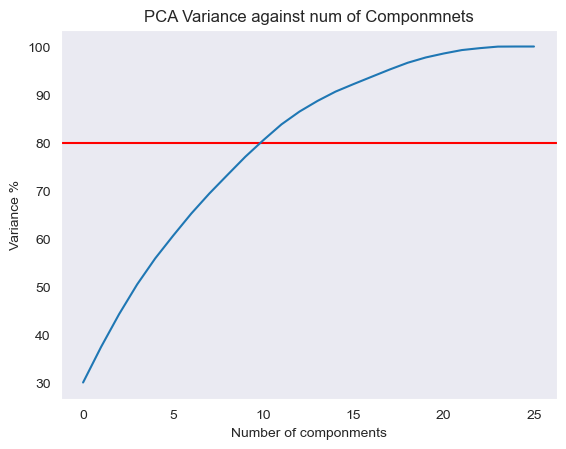

In [360]:
df_to_kmeans = df_select(num_and_cat_cols, df)
df_kmeans_scaled_train = standard_scaling_dfs(df_to_kmeans)
pca_graph_df(df_scaled= df_kmeans_scaled_train, exp_variance= 80) #Step 3.1.1

In [361]:
df_with_pca = create_pca_df(10, df_kmeans_scaled_train)

## Model Train

In [362]:
ks = range(1,11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k).fit(df_with_pca)
    inertias.append(model.inertia_)

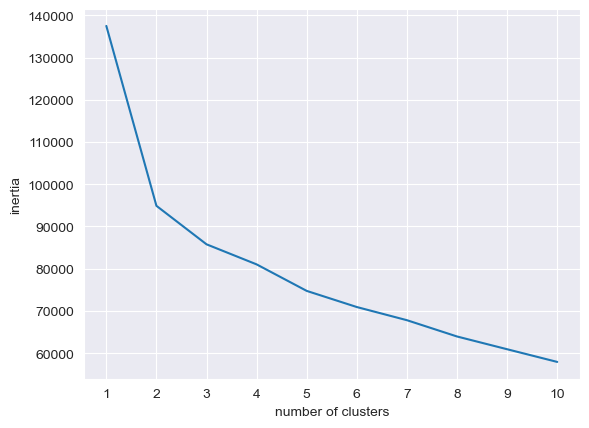

In [363]:
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [364]:
kmeans= KMeans(n_clusters = 4, max_iter =10000, random_state= 1)
kmeans.fit(df_with_pca)
pca_train_label = kmeans.labels_
pca_train_label = pd.DataFrame(pca_train_label)

In [365]:
df.reset_index(inplace=True)
pca_train_label.reset_index(inplace=True)
df_final=pd.concat([df,pca_train_label],axis=1)
df_final.set_index('CustomerID',inplace=True)
df_final.drop(['index'],axis=1,inplace=True)
df_final= df_final.rename(columns={0:'Cluster'})
df_final

Income  Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  \
CustomerID                                                                  
14594       113947.0             0               0     43.0         3.667   
19070       114297.0             0               0     74.0         3.850   
29888       115476.0             0               0     85.0         3.616   
12221       101172.0             1               1     25.0         3.555   
21107       123128.0             0               0     64.0         3.732   
...              ...           ...             ...      ...           ...   
30686        98968.0             0               0     66.0         3.959   
17210       109977.0             0               0      8.0         3.769   
29186        56039.0             0               1     30.0         2.733   
23312        44867.0             1               0      8.0         1.908   
15581       124379.0             0               0     80.0         3.862   

            MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                            
14594            3.529                3.756      3.350        2.751   
19070            3.566                3.882      3.265        3.087   
29888            2.581                3.689      3.561        2.581   
12221            0.000                3.248      1.908        2.258   
21107            3.052                3.978      2.818        2.751   
...                ...                  ...        ...          ...   
30686            2.417                3.779      2.417        0.000   
17210            3.009                4.129      3.580        0.000   
29186            0.000                2.134      0.000        0.000   
23312            2.083                2.324      2.083        2.004   
15581            2.626                3.229      3.575        3.274   

            MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
CustomerID                                                              
14594                       2.190              0.477               10   
19070                       1.672              0.301                5   
29888                       1.462              0.301                5   
12221                       1.176              0.778                8   
21107                       1.875              0.000                4   
...                           ...                ...              ...   
30686                       1.613              0.301                6   
17210                       1.940              0.301                5   
29186                       0.778              0.477                3   
23312                       1.255              0.301                3   
15581                       2.373              0.301                6   

            NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  \
CustomerID                                                               
14594                      0.903                  7                  4   
19070                      1.000                 12                  2   
29888                      0.778                  7                  1   
12221                      0.602                  8                  5   
21107                      0.903                  8                  5   
...                          ...                ...                ...   
30686                      0.845                 11                  2   
17210                      0.903                  7                  2   
29186                      0.301                  4                  6   
23312                      0.301                  3                  8   
15581                      1.114                 11                  2   

            Complain  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
CustomerID                                                          
14594            0.0          0.000  

In [366]:
df_final.groupby('Cluster').mean().transpose()

Cluster                          0          1          2          3
Income                  108052.997  77003.126  75194.897  4.742e+04
Kid_Younger6                 0.034      0.443      0.551  8.013e-01
Children_6to18               0.312      0.772      0.493  4.548e-01
Recency                     50.444     48.201     50.931  4.872e+01
MntMeat&Fish                 3.684      3.429      2.964  2.167e+00
MntEntries                   2.850      1.958      2.042  1.360e+00
MntVegan&Vegetarian          3.675      3.123      2.961  2.247e+00
MntDrinks                    2.840      1.990      2.031  1.347e+00
MntDesserts                  2.833      1.985      2.001  1.349e+00
MntAdditionalRequests        1.673      1.581      1.306  9.282e-01
NumOfferPurchases            0.353      0.671      0.493  4.326e-01
NumAppPurchases              7.254      7.966      6.203  3.784e+00
NumTakeAwayPurchases         0.848      0.622      0.619  3.666e-01
NumStorePurchases            8.598      6.533      5.739  2.988e+00
NumAppVisitsMonth            2.985      6.503      5.087  6.574e+00
Complain                     0.000      0.000      0.301  0.000e+00
Response_Cmp1                0.021      0.032      0.031  2.098e-02
Response_Cmp2                0.035      0.032      0.017  3.688e-03
Response_Cmp3                0.067      0.005      0.026  1.037e-03
Response_Cmp4                0.048      0.010      0.017  8.067e-04
Response_Cmp5                0.007      0.006      0.009  1.152e-04
Male                         0.732      0.734      0.739  7.328e-01
Female                       0.268      0.266      0.261  2.672e-01
NumPurchasesTotal           22.325     17.940     16.072  8.185e+00
Age                         48.323     48.441     44.957  4.363e+01
daysAsCardClient           619.279    723.075    668.232  5.933e+02
Graduation                   0.520      0.488      0.449  4.985e-01
HighSchool                   0.088      0.072      0.145  1.164e-01
Master                       0.166      0.179      0.261  1.474e-01
PhD                          0.226      0.254      0.145  1.761e-01
Married                      0.656      0.641      0.652  6.612e-01
Single                       0.204      0.218      0.188  2.374e-01
Widow                        0.044      0.042      0.014  2.067e-02
MntTotal                 15321.817   6653.769   6587.078  7.905e+02
Mnt_pday_card               26.669      9.603     10.267  1.466e+00
Response_Campaigns           0.589      0.283      0.333  8.844e-02
Total_Kids                   0.346      1.215      1.043  1.256e+00
has_Kids                     0.324      0.917      0.754  8.966e-01
age_(17.943, 29.4]           0.106      0.026      0.101  9.992e-02
age_(29.4, 40.8]             0.216      0.209      0.304  3.396e-01
age_(40.8, 52.2]             0.258      0.390      0.319  3.270e-01
age_(52.2, 63.6]             0.260      0.310      0.188  1.826e-01
age_(63.6, 75.0]             0.160      0.065      0.087  5.092e-02
Pct_Meat&Fish                0.381      0.548      0.398  3.530e-01
Pct_Desserts                 0.082      0.059      0.089  1.016e-01
Pct_Entries                  0.083      0.057      0.081  1.055e-01
Pct_Drinks                   0.083      0.060      0.088  1.051e-01
Pct_Vegan&Vegetarian         0.366      0.266      0.333  3.184e-01
Pct_AdditionalRequests       0.005      0.010      0.010  1.654e-02
Pct_Store                    0.384      0.362      0.354  3.681e-01
Pct_App                      0.327      0.447      0.416  4.612e-01
Pct_TakeAway                 0.289      0.191      0.230  1.707e-01

In [367]:
df_final.groupby('Cluster').count()

Income  Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  \
Cluster                                                                
0          2348          2348            2348     2348          2348   
1          1835          1835            1835     1835          1835   
2            69            69              69       69            69   
3          2612          2612            2612     2612          2612   

         MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
Cluster                                                            
0              2348                 2348       2348         2348   
1              1835                 1835       1835         1835   
2                69                   69         69           69   
3              2612                 2612       2612         2612   

         MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  \
Cluster                                                              
0                         2348               2348             2348   
1                         1835               1835             1835   
2                           69                 69               69   
3                         2612               2612             2612   

         NumTakeAwayPurchases  NumStorePurchases  NumAppVisitsMonth  Complain  \
Cluster                                                                         
0                        2348               2348               2348      2348   
1                        1835               1835               1835      1835   
2                          69                 69                 69        69   
3                        2612               2612               2612      2612   

         Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
Cluster                                                               
0                 2348           2348           2348           2348   
1                 1835           1835           1835           1835   
2                   69             69             69             69   
3                 2612           2612           2612           2612   

         Response_Cmp5  Male  Female  NumPurchasesTotal   Age  \
Cluster                                                         
0                 2348  2348    2348               2348  2348   
1                 1835  1835    1835               1835  1835   
2                   69    69      69                 69    69   
3                 2612  2612    2612               2612  2612   

         daysAsCardClient  Graduation  HighSchool  Master   PhD  Married  \
Cluster                                                                    
0                    2348        2348        2348    2348  2348     2348   
1                    1835        1835        1835    1835  1835     1835   
2                      69          69          69      69    69       69   
3                    2612        2612        2612    2612  2612     2612   

         Single  Widow  MntTotal  Mnt_pday_card  Response_Campaigns  \
Cluster                                                               
0          2348   2348      2348           2348                2348   
1          1835   1835      1835           1835                1835   
2            69     69        69             69                  69   
3          2612   2612      2612           2612                2612   

         Total_Kids  has_Kids  age_(17.943, 29.4]  age_(29.4, 40.8]  \
Cluster                                                               
0              2348      2348                2348              2348   
1              1835      1835                1835              1835   
2                69        69                  69                69   
3              2612      2612                2612              2612   

         age_(40.8, 52.2]  age_(52.2, 63.6]  age_(63.6, 75.0]  Pct_Meat&Fish  \
Cluster                                           

## Measuring distances between clusters

In [368]:
dists = euclidean_distances(kmeans.cluster_centers_)
dists

array([[ 0.        ,  3.28964525, 10.50176336,  6.03226701],
       [ 3.28964525,  0.        , 10.13387868,  4.03575677],
       [10.50176336, 10.13387868,  0.        , 10.46175122],
       [ 6.03226701,  4.03575677, 10.46175122,  0.        ]])

In [369]:
cluster0 = df_final[df_final.Cluster == 0]
cluster1 = df_final[df_final.Cluster == 1]
cluster2 = df_final[df_final.Cluster == 2]
cluster3 = df_final[df_final.Cluster == 3]

<AxesSubplot: xlabel='Income', ylabel='Single'>

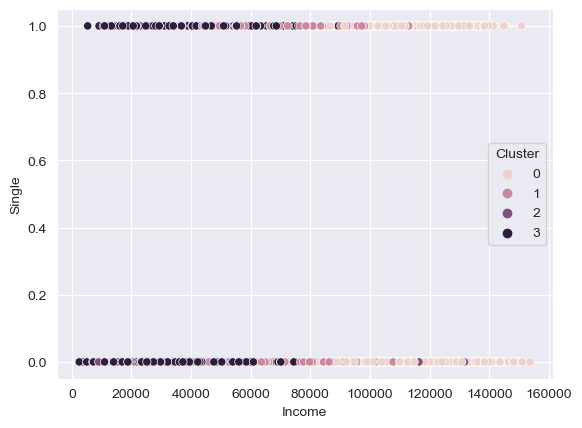

In [370]:
sns.scatterplot(data=df_final, x='Income', y='Single',hue='Cluster')

<function matplotlib.pyplot.legend(*args, **kwargs)>

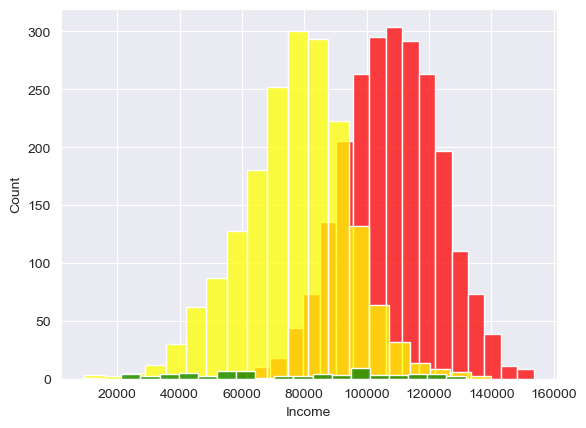

In [371]:
sns.histplot(cluster0['Income'],color='red',label='Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Cluster 2', bins = 20)
plt.legend

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_31734/1659289959.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Pct_Vegan&Vegetarian",data=df_final, ci=None)


<AxesSubplot: xlabel='Cluster', ylabel='Pct_Vegan&Vegetarian'>

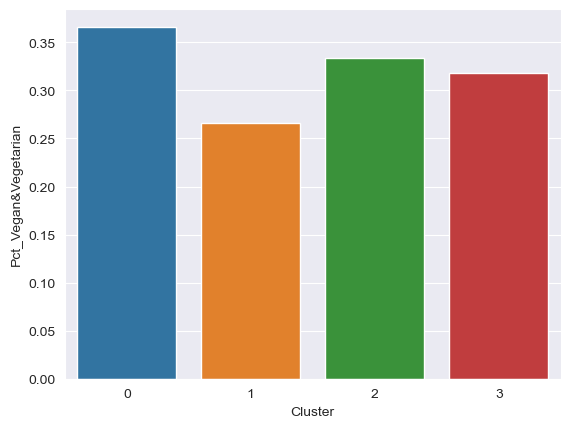

In [372]:
sns.barplot(x="Cluster", y="Pct_Vegan&Vegetarian",data=df_final, ci=None)

<AxesSubplot: xlabel='Cluster', ylabel='Pct_Meat&Fish'>

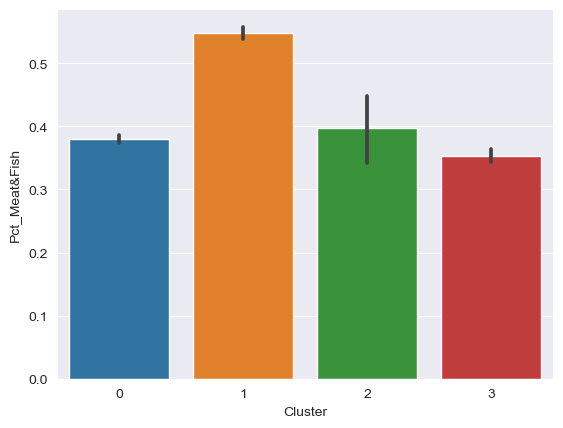

In [373]:
sns.barplot(x="Cluster", y="Pct_Meat&Fish", data=df_final)

<AxesSubplot: xlabel='Cluster', ylabel='Pct_Store'>

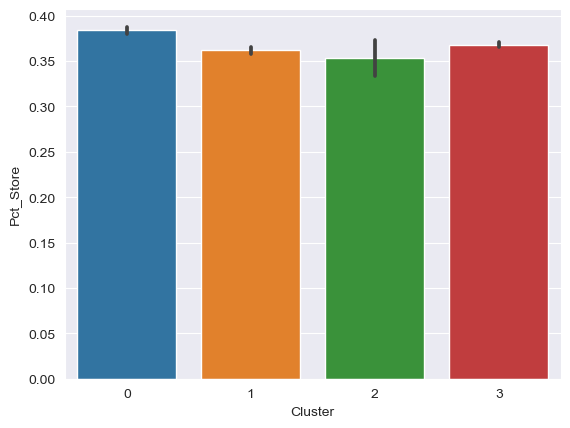

In [374]:
sns.barplot(x="Cluster", y="Pct_Store", data=df_final)

<AxesSubplot: xlabel='Pct_Meat&Fish', ylabel='Pct_Vegan&Vegetarian'>

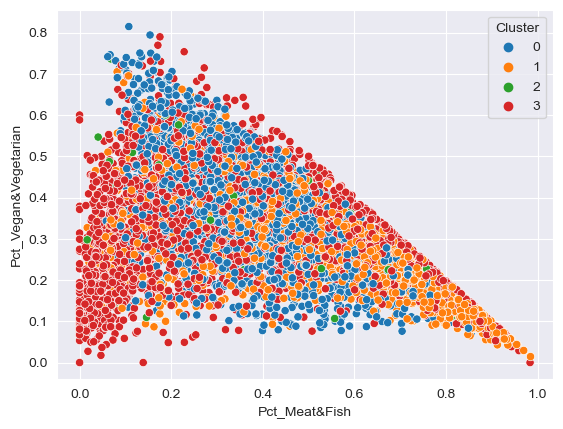

In [375]:
sns.scatterplot(data=df_final, x='Pct_Meat&Fish', y='Pct_Vegan&Vegetarian',hue='Cluster',palette='tab10')

<AxesSubplot: xlabel='Income', ylabel='Total_Kids'>

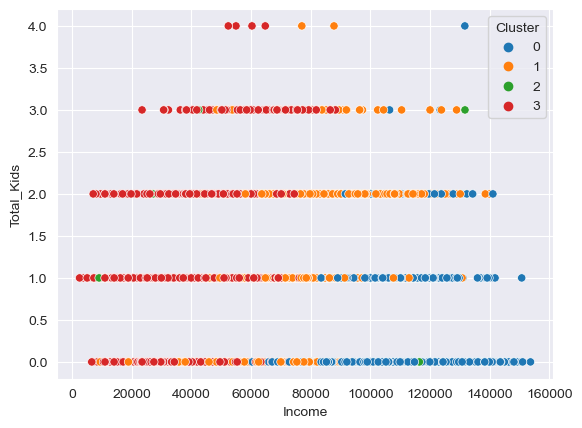

In [376]:
sns.scatterplot(data=df_final, x='Income', y='Total_Kids',hue='Cluster',palette='tab10')

<AxesSubplot: xlabel='Income', ylabel='MntTotal'>

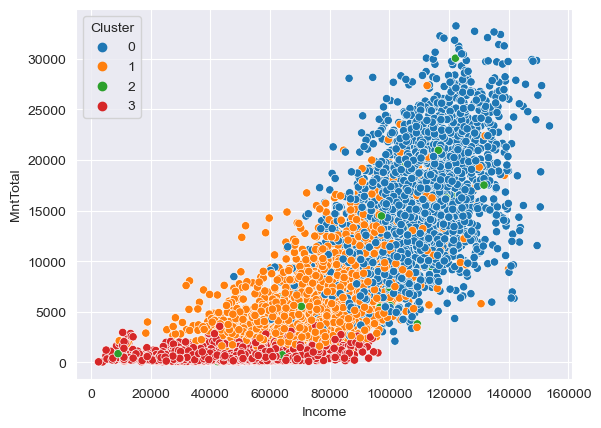

In [377]:
sns.scatterplot(data=df_final, x='Income', y='MntTotal',hue='Cluster',palette='tab10')

## K-Prototype

In [378]:
kprototype_columns = []
kprototype_columns.extend(num_cols)
kprototype_columns.extend(cat_cols)

kprototype_df = df_select(column_names= kprototype_columns, df= df)

df_num = kprototype_df[num_cols]
df_cat = kprototype_df[cat_cols]

df_num = df_num.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

df_num_scaled = standard_scaling_dfs(df_num)

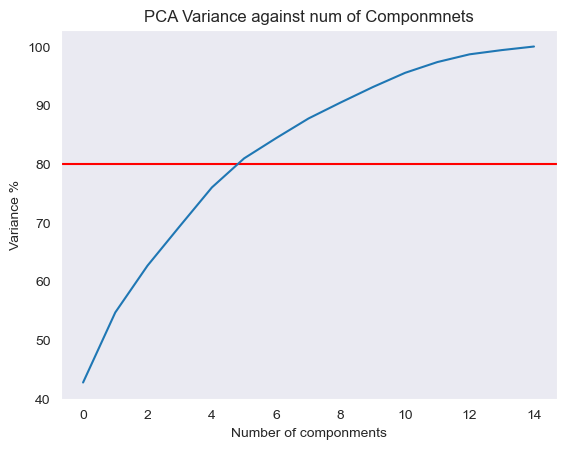

In [379]:
pca_graph_df(df_scaled= df_num_scaled, exp_variance= 80) #Step 3.1.1

In [380]:
df_num_pca = create_pca_df(4, df_num_scaled)

In [381]:
# Concatenando as colunas numéricas do PCA com as colunas categóricas
df_combined = pd.concat([pd.DataFrame(df_num_pca), df_cat], axis=1)

In [382]:
def plot_elbow(X, k_range):
    costs = []
    for k in k_range:
        print(k)
        kp = KPrototypes(n_clusters=k, init='Huang', n_init=20, verbose=0, n_jobs=4, random_state=1)
        kp.fit(X, categorical=[i for i in range(4, len(X.columns))])
        costs.append(kp.cost_)
    plt.plot(k_range, costs, marker='o')
    plt.xticks(k_range)
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Cost')
    plt.show()

In [383]:
# plot_elbow(df_combined, range(1, 11))

In [384]:
df_combined.head()

0      1      2      3  Married  Single  Widow  NumPurchasesTotal  \
0 -3.466  0.728 -0.684 -0.232        0       1      0                 24   
1 -3.731 -1.151 -0.494  0.527        1       0      0                 26   
2 -2.362 -2.021  0.052  0.747        1       0      0                 17   
3 -0.404  0.921  1.861 -0.688        1       0      0                 19   
4 -2.784 -1.237 -0.855  0.319        0       1      0                 19   

   Response_Campaigns  Kid_Younger6  age_(17.943, 29.4]  age_(29.4, 40.8]  \
0                   1             0                   0                 0   
1                   0             0                   0                 0   
2                   0             0                   0                 0   
3                   0             1                   0                 0   
4                   2             0                   0                 0   

   age_(40.8, 52.2]  age_(52.2, 63.6]  age_(63.6, 75.0]  
0                 1                 0                 0  
1                 1                 0                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0

In [396]:
kp = KPrototypes(n_clusters=4, init='Huang', n_init=20, verbose=0, n_jobs=4, random_state=1)
clusters_kp = kp.fit_predict(df_combined, categorical=[i for i in range(4, len(df_combined.columns))])

In [397]:
df['Cluster_KP'] = clusters_kp
export_csv_to_analyze_cluster_results(df, 'Cluster_KP')

Income (mean)  Kid_Younger6 (mean)  Children_6to18 (mean)  \
Cluster_KP                                                              
0               45780.879                0.783                  0.363   
1              108337.814                0.053                  0.296   
2               51516.397                0.780                  0.581   
3               80692.913                0.381                  0.803   

            Complain (sum)  NumPurchasesTotal (mean)  Age (mean)  Male (sum)  \
Cluster_KP                                                                     
0                    6.924                     9.299      42.512        1095   
1                    6.623                    21.981      48.084        1670   
2                    2.709                     7.762      45.778        1028   
3                    4.515                    19.487      48.696        1237   

            Female (sum)  daysAsCardClient (mean)  Graduation (sum)  \
Cluster_KP                                                            
0                    424                  679.920             814.0   
1                    626                  607.838            1199.0   
2                    352                  521.225             634.0   
3                    432                  736.388             803.0   

            HighSchool (sum)  Master (sum)  PhD (sum)  Married (sum)  \
Cluster_KP                                                             
0                        229         177.0      169.0          994.0   
1                        201         387.0      509.0         1499.0   
2                        103         252.0      350.0          908.0   
3                        119         305.0      438.0         1088.0   

            Single (sum)  Widow (sum)  MntTotal (mean)  \
Cluster_KP                                               
0                  379.0           31         1284.110   
1                  477.0           97        15161.000   
2                  309.0           38          602.710   
3                  347.0           70         7856.652   

            Response_Campaigns (mean)  Total_Kids (mean)  \
Cluster_KP                                                 
0                               0.107              1.145   
1                               0.568              0.348   
2                               0.088              1.362   
3                               0.339              1.184   

            Pct_Meat&Fish (mean)  Pct_Desserts (mean)  Pct_Entries (mean)  \
Cluster_KP                                                                  
0                          0.263                0.131               0.133   
1                          0.371                0.085               0.085   
2                          0.462                0.067               0.073   
3                          0.575                0.052               0.050   

            Pct_AdditionalRequests (mean)  Pct_Drinks (mean)  \
Cluster_KP                                                     
0                                   0.018              0.136   
1                                   0.005              0.086   
2                                   0.014              0.068   
3                                   0.009              0.052   

            Pct_Vegan&Vegetarian (mean)  Pct_Store (mean)  Pct_App (mean)  \
Cluster_KP                                                                  
0                                 0.319             0.353           0.470   
1                                 0.368             0.387           0.324   
2                                 0.316             0.380           0.454   
3                                 0.261             0.362           0.442   

            Pct_TakeAway (mean)  
Cluster_KP                       
0                         0.177  
1                         0.290  
2                         0.167  
3                         0.196

In [398]:
kprototype_df.head()

Income  Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  \
0  113947.0     43.0         3.667       3.529                3.756   
1  114297.0     74.0         3.850       3.566                3.882   
2  115476.0     85.0         3.616       2.581                3.689   
3  101172.0     25.0         3.555       0.000                3.248   
4  123128.0     64.0         3.732       3.052                3.978   

   MntDrinks  MntDesserts  MntAdditionalRequests  NumOfferPurchases  \
0      3.350        2.751                  2.190              0.477   
1      3.265        3.087                  1.672              0.301   
2      3.561        2.581                  1.462              0.301   
3      1.908        2.258                  1.176              0.778   
4      2.818        2.751                  1.875              0.000   

   NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  \
0               10                 0.903                  7   
1                5                 1.000                 12   
2                5                 0.778                  7   
3                8                 0.602                  8   
4                4                 0.903                  8   

   NumAppVisitsMonth  Complain  daysAsCardClient  Married  Single  Widow  \
0                  4       0.0               827        0       1      0   
1                  2       0.0               736        1       0      0   
2                  1       0.0               459        1       0      0   
3                  5       0.0               551        1       0      0   
4                  5       0.0               856        0       1      0   

   NumPurchasesTotal  Response_Campaigns  Kid_Younger6  age_(17.943, 29.4]  \
0                 24                   1             0                   0   
1                 26                   0             0                   0   
2                 17                   0             0                   0   
3                 19                   0             1                   0   
4                 19                   2             0                   0   

   age_(29.4, 40.8]  age_(40.8, 52.2]  age_(52.2, 63.6]  age_(63.6, 75.0]  
0                 0                 1                 0                 0  
1                 0                 1                 0                 0  
2                 0                 0                 1                 0  
3                 0                 1                 0                 0  
4                 0                 1                 0                 0

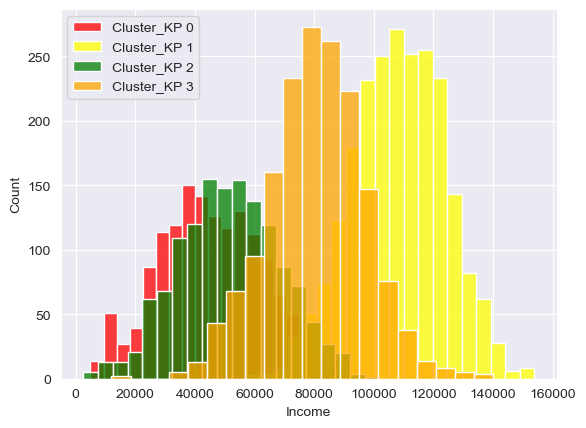

In [399]:
cluster0 = df[df.Cluster_KP == 0]
cluster1 = df[df.Cluster_KP == 1]
cluster2 = df[df.Cluster_KP == 2]
cluster3 = df[df.Cluster_KP == 3]


sns.histplot(cluster0['Income'], color='red', label='Cluster_KP 0', bins=20)
sns.histplot(cluster1['Income'], color='yellow', label='Cluster_KP 1', bins=20)
sns.histplot(cluster2['Income'], color='green', label='Cluster_KP 2', bins=20)
sns.histplot(cluster3['Income'], color='orange', label='Cluster_KP 3', bins=20)

plt.legend()

In [400]:
dists = euclidean_distances(kp.cluster_centroids_)
dists

array([[ 0.        , 15.77908435,  3.02110404,  8.72718481],
       [15.77908435,  0.        , 18.04662624,  7.63499649],
       [ 3.02110404, 18.04662624,  0.        , 11.09280333],
       [ 8.72718481,  7.63499649, 11.09280333,  0.        ]])

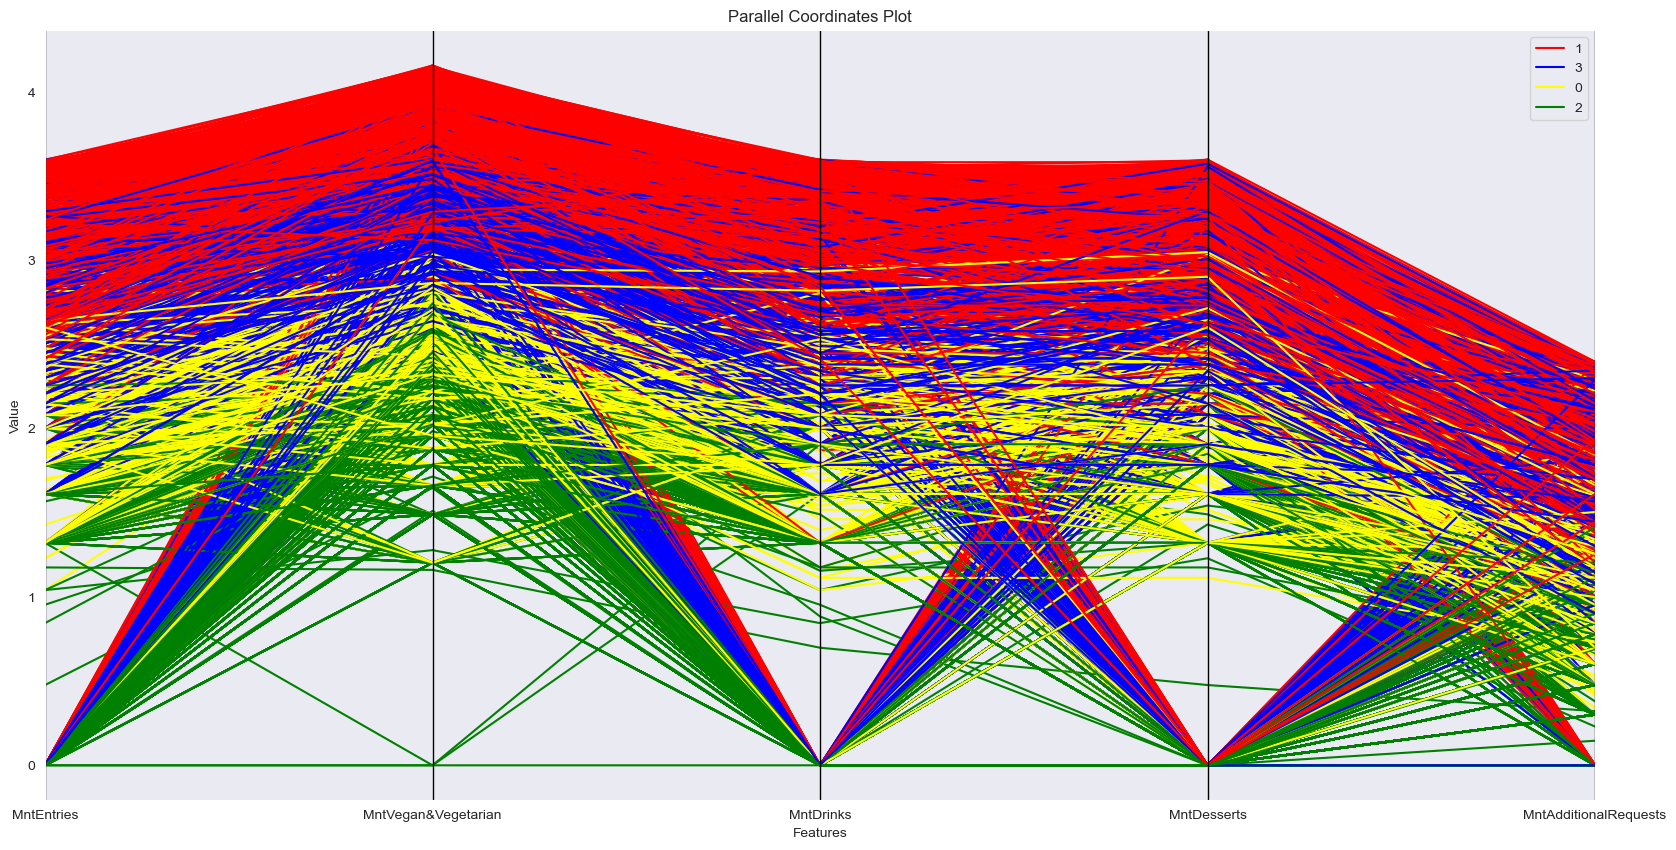

In [401]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'Cluster_KP']], 'Cluster_KP', color=('red', 'blue', 'yellow', 'green'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()

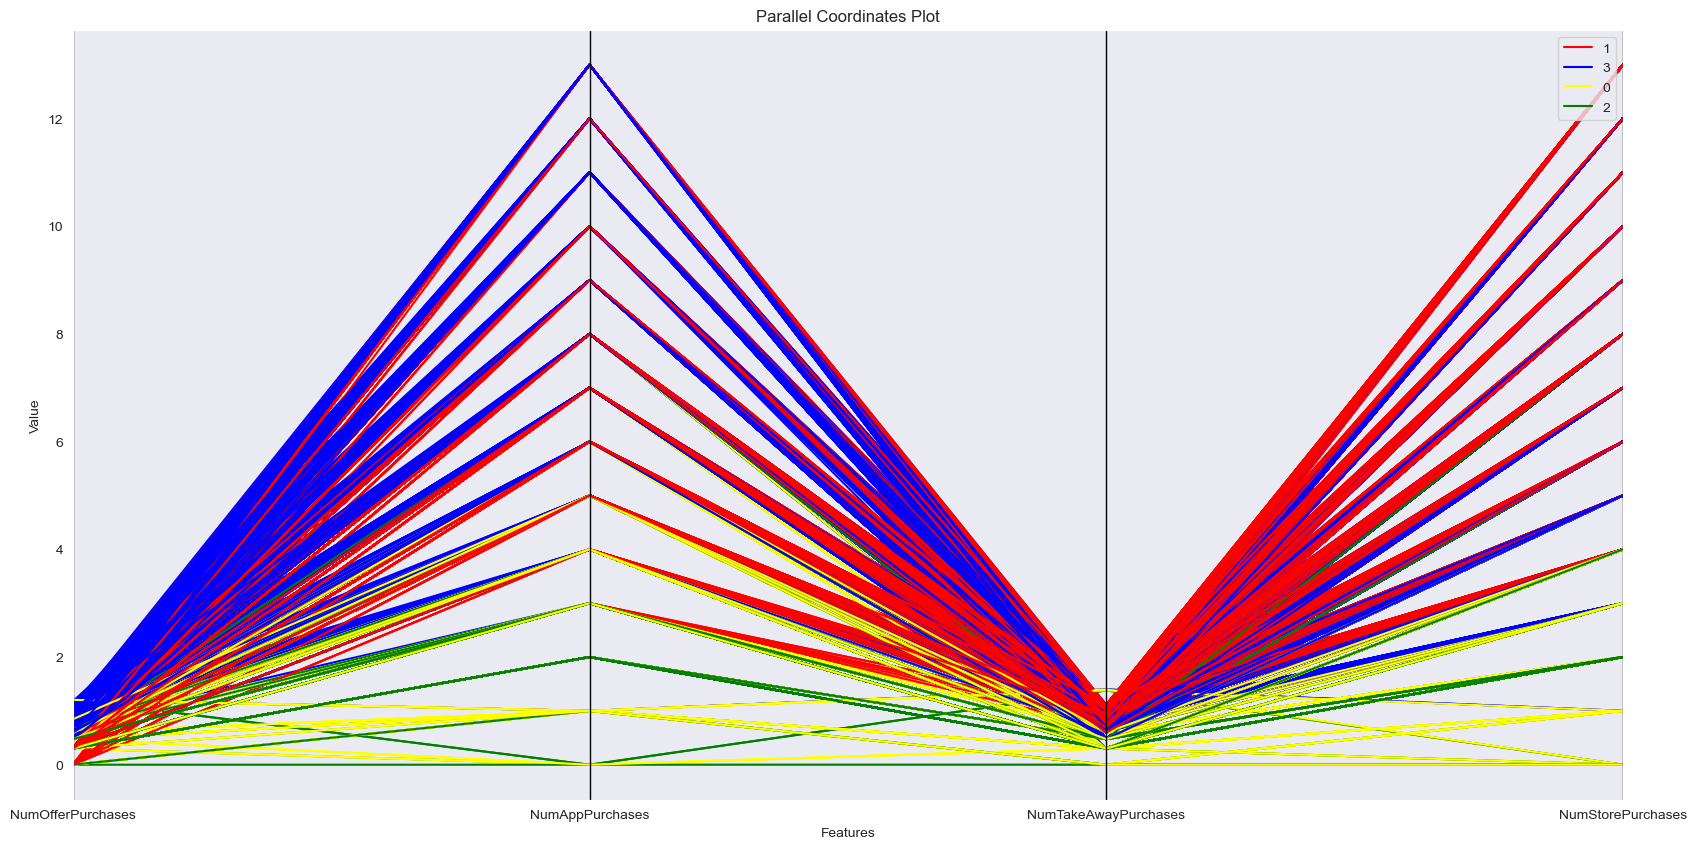

In [402]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['NumOfferPurchases', 'NumAppPurchases',
            'NumTakeAwayPurchases', 'NumStorePurchases', 'Cluster_KP']], 'Cluster_KP', color=('red', 'blue', 'yellow', 'green'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()

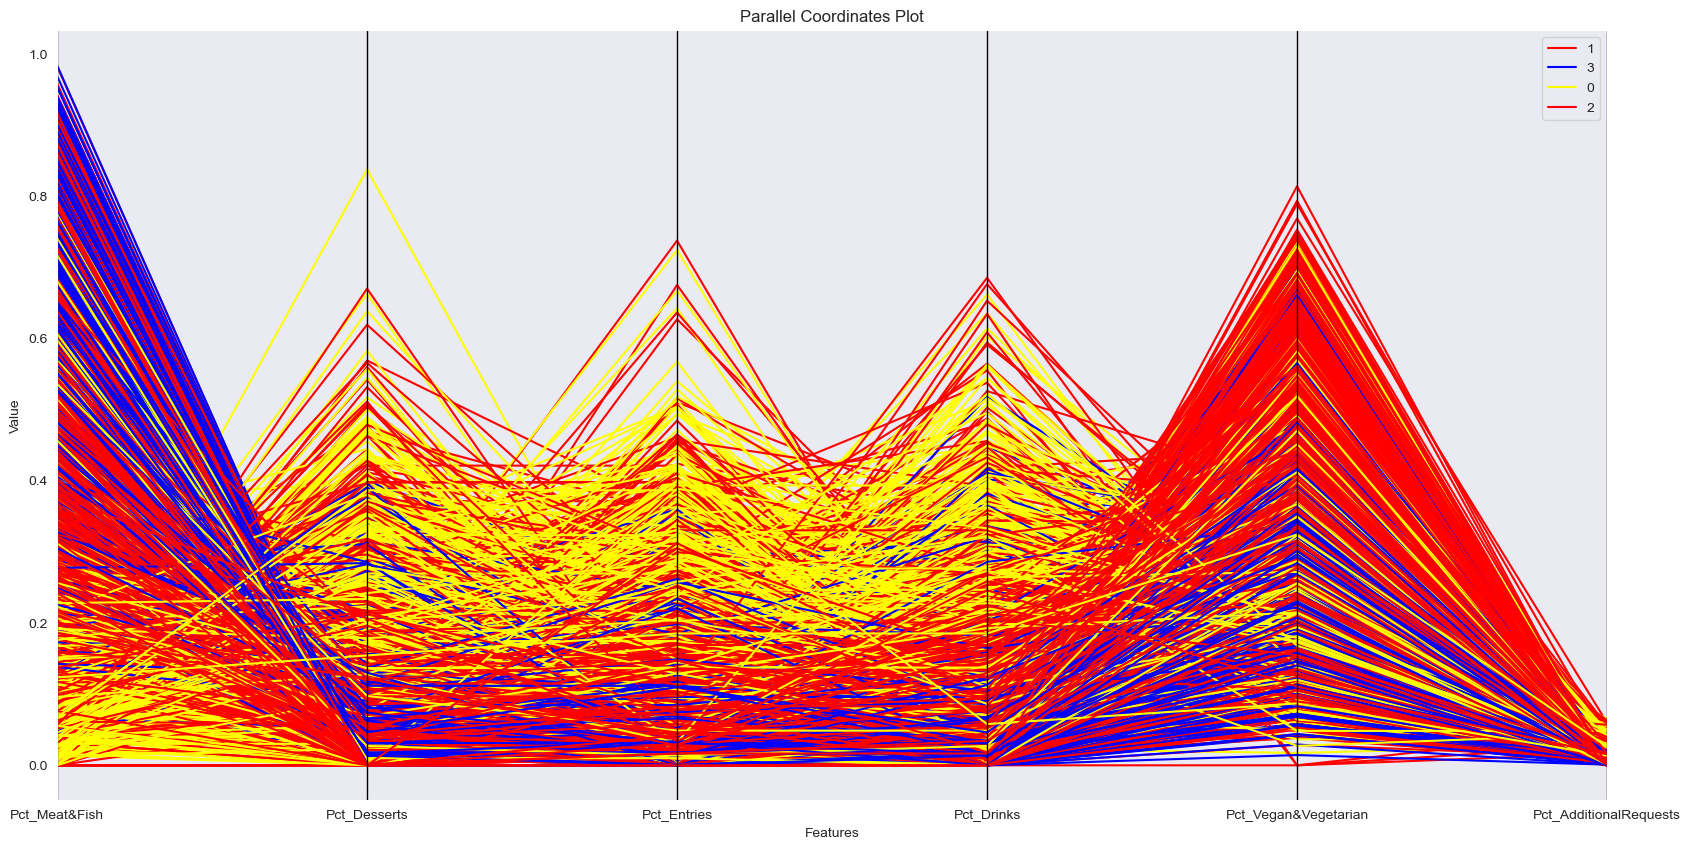

In [403]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries',
       'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests', 'Cluster_KP']], 'Cluster_KP', color=('red', 'blue', 'yellow'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()

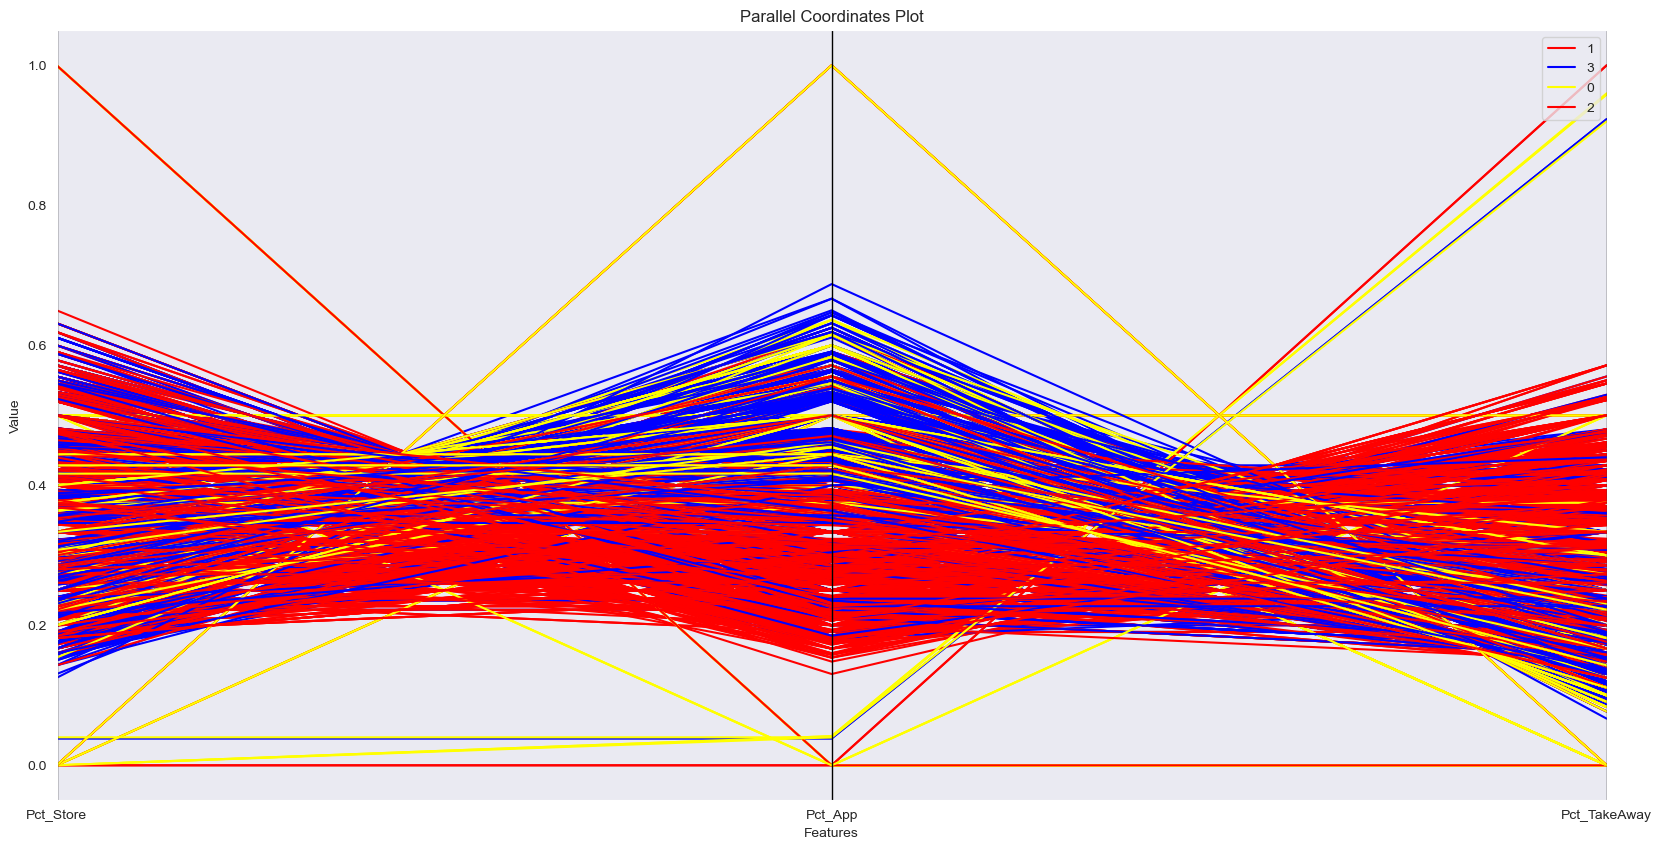

In [404]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[[ 'Pct_Store', 'Pct_App', 'Pct_TakeAway', 'Cluster_KP']], 'Cluster_KP', color=('red', 'blue', 'yellow'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

plt.show()